In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\ML_CSV\\student_grade_multiclass.csv")
df

,CGPA,Attendance,Projects,Discipline_Score,Extra_Curricular,Grade
0,6.44,67.52,3,3,1,1
1,6.37,90.99,2,6,1,1
2,7.75,59.32,2,7,1,0
3,4.99,82.98,5,9,1,0
4,7.39,71.95,3,4,0,1
...,...,...,...,...,...,...
115,5.27,67.03,2,5,1,0
116,5.89,93.50,4,10,1,1
117,6.13,79.65,4,10,1,1
118,5.82,67.00,2,2,1,2


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x = df.drop("Grade",axis="columns")
y = df.Grade

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [7]:
model.fit(X_train,y_train)

C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [8]:
model.score(X_test,y_test)

0.7916666666666666

In [9]:
model.predict([[7.9,87,4,8,1]])

C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.88      0.82      0.85        17
           2       0.00      0.00      0.00         2

    accuracy                           0.79        24
   macro avg       0.50      0.61      0.54        24
weighted avg       0.75      0.79      0.76        24



C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\parth\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

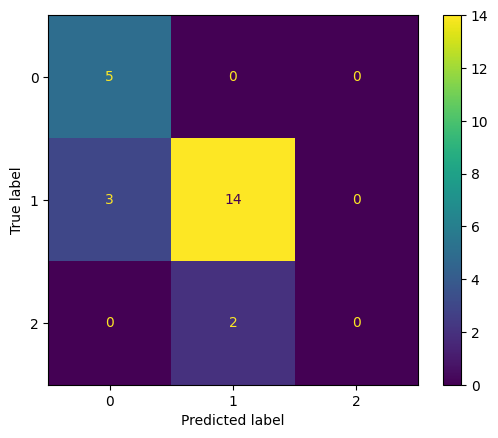

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)